In [77]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import mplhep as hep
hep.style.use("ATLAS")

In [2]:
custom_color_list = ["#000000", "#0C5DA5", "#00B945", "#FF9500", "#FF2C00", "#845B97", "#474747", "#9e9e9e"]
color_cycle = cycle(custom_color_list)

# Define a cycle for line styles. Each element is a tuple (name, linestyle)
# Note: Built-in line styles 'solid', 'dotted', 'dashed', 'dashdot' are provided as strings,
# while 'dashdotdotted' is a custom dash style given as a tuple (offset, dash_sequence)
default_line_styles = cycle([
    ('solid', 'solid'),                       # Solid line, same as '-' or (0, ())
    ('dotted', 'dotted'),                     # Dotted line, same as ':'
    ('dashed', 'dashed'),                     # Dashed line, same as '--'
    ('dashdot', 'dashdot'),                   # Dash-dot line, same as '-.'
    ('dashdotdotted', (0, [8, 4, 2, 4, 2, 4, 2, 4]))  # Custom dash style: dash-dot-dot-dotted
])

marker_cycle = cycle(["o", "s", "v", "^", "D", "p", "h"])


In [64]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle

# Global lists for cycles
custom_color_list = ["#000000", "#0C5DA5", "#00B945", "#FF9500", "#FF2C00", "#845B97", "#474747", "#9e9e9e"]
default_line_styles = [
    ('solid', 'solid'),                       # Solid line, same as '-' or (0, ())
    ('dotted', 'dotted'),                     # Dotted line, same as ':'
    ('dashed', 'dashed'),                     # Dashed line, same as '--'
    ('dashdot', 'dashdot'),                   # Dash-dot line, same as '-.'
    ('dashdotdotted', (0, [8, 4, 2, 4, 2, 4, 2, 4]))  # Custom dash style: dash-dot-dot-dotted
]
default_marker_list = ["o", "s", "v", "^", "D", "p", "h"]

def plot_band(x, y, yerr, ax=None, label=None, 
              linewidth=2, alpha=0.2, color=None, linestyle=None):
    """
    Plots a curve with a shaded error band.
    
    Parameters:
        x : array-like
            Data for the x-axis.
        y : array-like
            Data for the y-axis.
        yerr : array-like or scalar
            Symmetric error values.
        ax : matplotlib.axes.Axes, optional
            The axes on which to plot (defaults to the current axes).
        label : str, optional
            Label for the curve.
        linewidth : float, optional
            Line width (default is 2).
        alpha : float, optional
            Transparency of the error band (default is 0.2).
        color : str, optional
            Line color; if None, it is automatically chosen from the band color cycle.
        linestyle : optional
            Line style; if None, it is automatically chosen from the band line style cycle.
            For custom dash styles, a tuple is passed to matplotlib.
    
    Returns:
        ax : matplotlib.axes.Axes
            The axes with the plotted data.
    """
    ax = plt.gca() if ax is None else ax

    # Reinitialize the band cycles for a new figure
    if not hasattr(ax, '_my_band_cycle_figure') or ax._my_band_cycle_figure != ax.figure:
        ax._my_band_color_cycle = cycle(custom_color_list)
        ax._my_band_line_style_cycle = cycle(default_line_styles)
        ax._my_band_cycle_figure = ax.figure

    # Get color and line style from the band cycles
    if color is None:
        color = next(ax._my_band_color_cycle)
    if linestyle is None:
        linestyle = next(ax._my_band_line_style_cycle)[1]
    
    # Plot the main curve and its error band
    ax.plot(x, y, color=color, linestyle=linestyle, linewidth=linewidth, label=label)
    ax.fill_between(x, y - yerr, y + yerr, color=color, alpha=alpha)
    
    return ax

def plot_exp(x, y, stat_err, sys_err=None, ax=None, label=None,
                                         marker=None, markersize=6, box_width=None,
                                         linewidth=2, capsize=0):
    """
    Plots experimental data with both statistical errors (displayed using error bars)
    and optional systematic errors (displayed as rectangular boxes). The error bars are
    drawn without horizontal caps (capsize and capthick set to 0).
    
    
    Parameters:
        x : array-like
            Data for the x-axis.
        y : array-like
            Data for the y-axis.
        stat_err : array-like or scalar
            Statistical error, used in the errorbar.
        sys_err : array-like or scalar, optional
            Systematic error, used to draw error boxes. If None, only error bars are plotted.
        ax : matplotlib.axes.Axes, optional
            The axes on which to plot (defaults to the current axes).
        label : str, optional
            Label for the data.
        marker : str, optional
            Marker style for data points; if None, it is automatically taken from the marker cycle.
        markersize : int, optional
            Marker size for the data points (default is 8).
        box_width : float, optional
            Width of the error box. If None, it is automatically set to 5% of the x-axis range.
        linewidth : float, optional
            Line width for error bars and box borders (default is 2).
        capsize : float, optional
            Cap size for the error bars (default is 0 to remove horizontal caps).
    
    Returns:
        ax : matplotlib.axes.Axes
            The axes with the plotted data.
    """
    ax = plt.gca() if ax is None else ax

    # Reinitialize the experimental data cycles for a new figure
    if not hasattr(ax, '_my_exp_cycle_figure') or ax._my_exp_cycle_figure != ax.figure:
        ax._my_exp_color_cycle = cycle(custom_color_list)
        ax._my_exp_marker_cycle = cycle(default_marker_list)
        ax._my_exp_cycle_figure = ax.figure

    # Get color and marker from the experimental data cycles
    color = next(ax._my_exp_color_cycle)
    if marker is None:
        marker = next(ax._my_exp_marker_cycle)
    
    # Plot statistical error using errorbar (with capsize and capthick set to 0)
    ax.errorbar(x, y, yerr=stat_err, fmt=marker, markersize=markersize,
                color=color, ecolor=color, elinewidth=linewidth, capsize=capsize, capthick=0,
                label=label)
    
    # Determine the box width automatically if not provided: 5% of the x-axis range
    if box_width is None:
        if len(x) > 1:
            box_width = 0.04 * (max(x) - min(x))
        else:
            box_width = 0.1  # default value if only one point

    # If sys_err is provided, plot the systematic error as a rectangular box for each data point
    if sys_err is not None:
        try:
            sys_err_iter = iter(sys_err)
        except TypeError:
            sys_err_iter = [sys_err] * len(x)
        for xi, yi, sei in zip(x, y, sys_err_iter):
            rect = plt.Rectangle((xi - box_width/2, yi - sei), box_width, 2 * sei,
                                 edgecolor=color, facecolor='none', linestyle='-', linewidth=linewidth)
            ax.add_patch(rect)
    
    return ax



(0.0, 2.05)

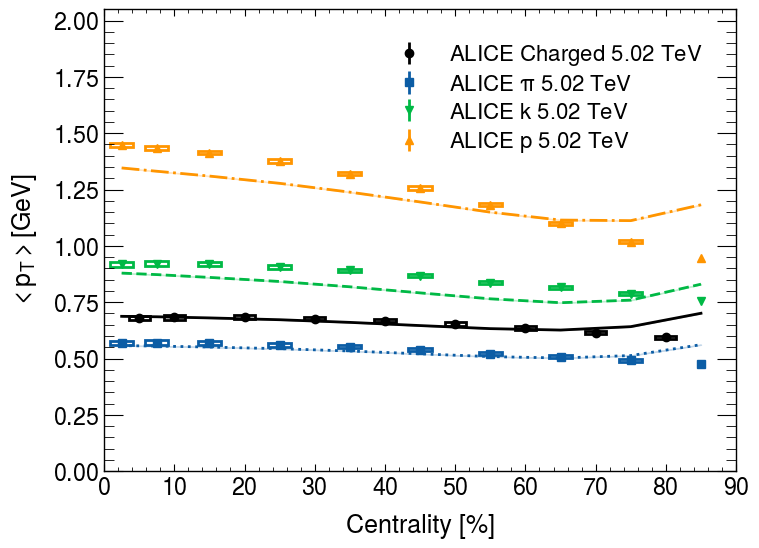

In [94]:
fig, ax = plt.subplots()
model_meanpt=np.loadtxt("./mean_ch.dat")
model_meanpt_pi=np.loadtxt("./mean_pi.dat")
model_meanpt_k=np.loadtxt("./mean_k.dat")
model_meanpt_p=np.loadtxt("./mean_p.dat")

plot_band(model_meanpt[:,0],model_meanpt[:,1],model_meanpt[:,2])
plot_band(model_meanpt_pi[:,0],model_meanpt_pi[:,1],model_meanpt_pi[:,2])
plot_band(model_meanpt_k[:,0],model_meanpt_k[:,1],model_meanpt_k[:,2])
plot_band(model_meanpt_p[:,0],model_meanpt_p[:,1],model_meanpt_p[:,2])

meanpt=np.loadtxt("./mean_pT_ch.dat")
meanpt_pi=np.loadtxt("./mean_pT_pion.dat")
meanpt_k=np.loadtxt("./mean_pT_kaon.dat")
meanpt_p=np.loadtxt("./mean_pT_proton.dat")

plot_exp(meanpt[:,2],meanpt[:,3],meanpt[:,4],sys_err=meanpt[:,5],label=r"$\rm ALICE\ Charged $"+" 5.02 TeV")
plot_exp(meanpt_pi[:,2],meanpt_pi[:,3],meanpt_pi[:,4],sys_err=meanpt[:,5],label=r"$\rm ALICE\ \pi$"+" 5.02 TeV")
plot_exp(meanpt_k[:,2],meanpt_k[:,3],meanpt_k[:,4],sys_err=meanpt[:,5],label=r"$\rm ALICE\ k $"+" 5.02 TeV")
plot_exp(meanpt_p[:,2],meanpt_p[:,3],meanpt_p[:,4],sys_err=meanpt[:,5],label=r"$\rm ALICE\ p $"+" 5.02 TeV")


ax.set_xlabel("Centrality [%]",loc="center",fontsize=18)
ax.set_ylabel(r"$\rm <p_T> [GeV]$",loc="center",fontsize=18)
ax.legend(fontsize=16)
ax.set_ylim(0,2.05)


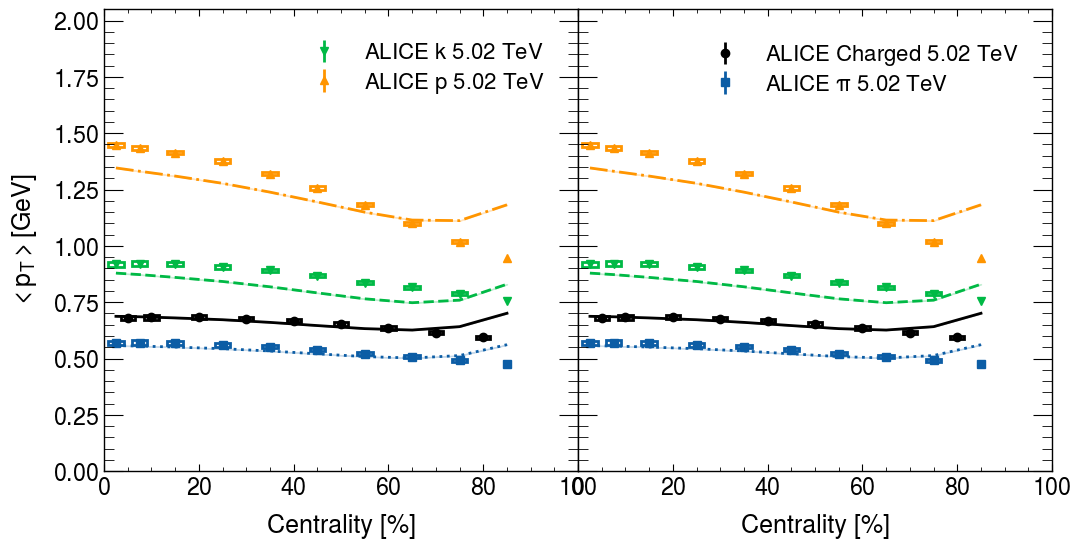

In [100]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
plt.subplots_adjust(wspace=0)

plot_band(model_meanpt[:,0],model_meanpt[:,1],model_meanpt[:,2],ax=axes[0])
plot_band(model_meanpt_pi[:,0],model_meanpt_pi[:,1],model_meanpt_pi[:,2],ax=axes[0])
plot_band(model_meanpt_k[:,0],model_meanpt_k[:,1],model_meanpt_k[:,2],ax=axes[0])
plot_band(model_meanpt_p[:,0],model_meanpt_p[:,1],model_meanpt_p[:,2],ax=axes[0])

plot_exp(meanpt[:,2],meanpt[:,3],meanpt[:,4],sys_err=meanpt[:,5],label=None,ax=axes[0])
plot_exp(meanpt_pi[:,2],meanpt_pi[:,3],meanpt_pi[:,4],sys_err=meanpt[:,5],label=None,ax=axes[0])
plot_exp(meanpt_k[:,2],meanpt_k[:,3],meanpt_k[:,4],sys_err=meanpt[:,5],label=r"$\rm ALICE\ k $"+" 5.02 TeV",ax=axes[0])
plot_exp(meanpt_p[:,2],meanpt_p[:,3],meanpt_p[:,4],sys_err=meanpt[:,5],label=r"$\rm ALICE\ p $"+" 5.02 TeV",ax=axes[0])


plot_band(model_meanpt[:,0],model_meanpt[:,1],model_meanpt[:,2],ax=axes[1])
plot_band(model_meanpt_pi[:,0],model_meanpt_pi[:,1],model_meanpt_pi[:,2],ax=axes[1])
plot_band(model_meanpt_k[:,0],model_meanpt_k[:,1],model_meanpt_k[:,2],ax=axes[1])
plot_band(model_meanpt_p[:,0],model_meanpt_p[:,1],model_meanpt_p[:,2],ax=axes[1])

plot_exp(meanpt[:,2],meanpt[:,3],meanpt[:,4],sys_err=meanpt[:,5],label=r"$\rm ALICE\ Charged $"+" 5.02 TeV",ax=axes[1])
plot_exp(meanpt_pi[:,2],meanpt_pi[:,3],meanpt_pi[:,4],sys_err=meanpt[:,5],label=r"$\rm ALICE\ \pi$"+" 5.02 TeV",ax=axes[1])
plot_exp(meanpt_k[:,2],meanpt_k[:,3],meanpt_k[:,4],sys_err=meanpt[:,5],label=None,ax=axes[1])
plot_exp(meanpt_p[:,2],meanpt_p[:,3],meanpt_p[:,4],sys_err=meanpt[:,5],label=None,ax=axes[1])



axes[0].set_xlabel("Centrality [%]",loc="center",fontsize=18)
axes[1].set_xlabel("Centrality [%]",loc="center",fontsize=18)

axes[0].set_ylabel(r"$\rm <p_T> [GeV]$",loc="center",fontsize=18)
axes[0].legend(fontsize=16)
axes[0].set_ylim(0,2.05)

axes[1].legend(fontsize=16)
axes[1].set_ylim(0,2.05)

plt.show()